<h1> Implementing Random Forest Classifier </h1>
<h3> Importing Required Libraries </h3>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from joblib import dump, load #to save ur model
from sklearn.model_selection import GridSearchCV

<h3> Reading the Data from CSV file </h3>
<h4>1. Accident Data
<br>2. Casualities Data
<br>3. Vehicles Data
<br> We will try to add more and more features this time to build a highly accurate classifier.
<br><h3>Provided:</h3> <h5>Previously we have only used Accident Data to build our classifier without balancing the data and we didn't got a single considerable classifier which can classify most effectively in all of the accident_severity(3,2,1) scenarios.</h5></h4>

In [4]:
df_Acc=pd.read_csv('/Users/manasc12/MyProjects/Data/RealUKAccidentAnalysisData/dftRoadSafetyData_Accidents_2018.csv')
df_Veh=pd.read_csv('/Users/manasc12/MyProjects/Data/RealUKAccidentAnalysisData/dftRoadSafetyData_Vehicles_2018.csv')
df_Acc.head(5)

/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682


In [5]:
df_Veh

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2018010080971,1,9,0,18,0,0,0,0,0,...,6,1,32,6,1995,2,5,8,1,8
1,2018010080971,2,8,0,18,0,0,0,0,0,...,6,1,48,8,1798,8,6,1,1,1
2,2018010080973,1,9,0,18,0,2,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010080974,1,8,0,7,0,8,0,0,0,...,1,1,40,7,1797,8,6,3,1,3
4,2018010080974,2,9,0,18,0,1,0,0,3,...,6,1,21,5,-1,-1,-1,5,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226404,2018984116018,1,9,0,9,0,0,0,0,0,...,6,1,67,10,998,1,4,-1,3,-1
226405,2018984116018,2,9,0,15,0,0,1,0,7,...,6,1,24,5,3000,2,21,-1,3,-1
226406,2018984116018,3,9,0,2,6,0,0,0,0,...,6,3,-1,-1,2400,2,5,-1,-1,-1
226407,2018984116318,1,2,0,18,0,1,1,0,0,...,1,1,60,9,49,1,10,-1,3,-1


<h3> Data Cleaning and Wrangling

In [6]:
#Cleaning up the null valued rows
df_Acc_clnd=df_Acc[~df_Acc.isnull().any(axis=1)]
df_Veh_clnd=df_Veh[~df_Veh.isnull().any(axis=1)]

In [7]:
#Transforming 'Time' Attribute from hh:mm to only minutes
a= np.array([(int(str(x).split(':')[0])*60+int(str(x).split(':')[1])) for x in df_Acc_clnd['Time'].values])
df_Acc_clnd['Time_Conv']=a

<ipython-input-7-eeec47519302>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Acc_clnd['Time_Conv']=a


In [8]:
#Visualizing the shape 
print('df_Acc.shape---'+str(df_Acc.shape))
print('df_Veh.shape---'+str(df_Veh.shape))
print('df_Acc_clnd.shape---'+str(df_Acc_clnd.shape))
print('df_Veh_clnd.shape---'+str(df_Veh_clnd.shape))
print('----------------------------------------------------------------------')
print('df_Acc_clnd unique values---')
print('----------------------------------------------------------------------')
print(df_Acc_clnd.nunique(axis=0))
print('----------------------------------------------------------------------')
print('df_Veh_clnd unique values---')
print('----------------------------------------------------------------------')
print(df_Veh_clnd.nunique(axis=0))

df_Acc.shape---(122635, 32)
df_Veh.shape---(226409, 23)
df_Acc_clnd.shape---(116181, 33)
df_Veh_clnd.shape---(226409, 23)
----------------------------------------------------------------------
df_Acc_clnd unique values---
----------------------------------------------------------------------
Accident_Index                                 116181
Location_Easting_OSGR                           79980
Location_Northing_OSGR                          80961
Longitude                                      111657
Latitude                                       110374
Police_Force                                       43
Accident_Severity                                   3
Number_of_Vehicles                                 14
Number_of_Casualties                               17
Date                                              365
Day_of_Week                                         7
Time                                             1438
Local_Authority_(District)                        348
Local

In [9]:
#and Data Types
print('----------------------------------------------------------------------')
print('df_Acc_clnd Data types---')
print('----------------------------------------------------------------------')
print(df_Acc_clnd.dtypes)
print('----------------------------------------------------------------------')
print('df_Veh_clnd Data types---')
print('----------------------------------------------------------------------')
print(df_Veh_clnd.dtypes)

----------------------------------------------------------------------
df_Acc_clnd Data types---
----------------------------------------------------------------------
Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Roa

<h4>There are 2 sheets(2 dataframes). So lets check which are the columns(attributes/features) on which we can perform our join operation. Inorder to get a single dataframe.

In [11]:
print('-----------------------------------------')
print('Columns same in Accident and Vehicle:')
print('-----------------------------------------')
for c1 in df_Acc_clnd.columns:
    for c2 in df_Veh_clnd.columns:
        if(c1==c2):
            print(c1)

-----------------------------------------
Columns same in Accident and Vehicle:
-----------------------------------------
Accident_Index


<h4>Now that we know our join keys so lets merge our 3 dataframes

In [13]:
df_All_clnd=pd.merge(df_Acc_clnd,df_Veh_clnd,how='inner',on=['Accident_Index'])

<h4> Bifurcating Attributes for Training and Target

In [49]:
df=df_All_clnd.reset_index(drop=True)

##Drop the columns which are irrelevant to get before the accident or totally irrelevant w.r.t the prediction model
df.drop(['Date','Time','Accident_Index','Number_of_Casualties','Vehicle_Reference'
         ,'Police_Force','Did_Police_Officer_Attend_Scene_of_Accident','1st_Point_of_Impact'
         ,'Skidding_and_Overturning','Vehicle_Leaving_Carriageway','Hit_Object_off_Carriageway'
         ,'Driver_Home_Area_Type','Carriageway_Hazards','Towing_and_Articulation','Vehicle_Location-Restricted_Lane'
        ,'Hit_Object_in_Carriageway'],axis=1,inplace=True)

target_c=['Accident_Severity']
df_train=df.drop(target_c,axis=1)
df_target=df[target_c]

<h4> Balancing/Sampling

Text(0, 0.5, 'No. Of Records')

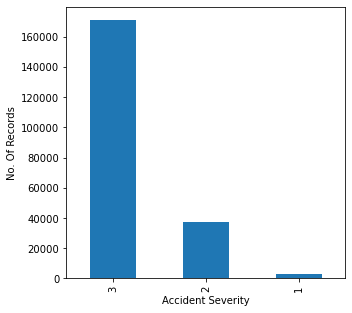

In [50]:
#Determining Balance of our Data Samples
acc_sev_counts=pd.value_counts(df_target['Accident_Severity'],sort=True)
plt.figure(figsize=(5,5))
acc_sev_counts.plot(kind='bar')
plt.xlabel('Accident Severity')
plt.ylabel('No. Of Records')


<h3>As u can see our data set is highly unbalanced w.r.t our output feature.
    <h5><br>1. And probably the reason for which we aren't able to train an effective model in our previous attempts.
    <br>2. But now we will resample our data to balance it and then we will apply our RandomForestClassifier on top of it.
    <br>3. But before applying resampling we would like to do some Label-Encoding as the classifier doesn't accept string data types.

<h4> LabelEncoding

In [51]:
labelEncodeCols=['LSOA_of_Accident_Location','Local_Authority_(Highway)']
#labelEncodeCols=['Local_Authority_(Highway)']
Local_Authority_Highway               = LabelEncoder()
LSOA_of_Accident_Location               = LabelEncoder()

Local_Authority_Highway.fit(df_train['Local_Authority_(Highway)'])
LSOA_of_Accident_Location.fit(df_train['LSOA_of_Accident_Location'])

df_train['Local_Authority_(Highway)_E']=Local_Authority_Highway.transform(df_train['Local_Authority_(Highway)'])
df_train['LSOA_of_Accident_Location_E']=LSOA_of_Accident_Location.transform(df_train['LSOA_of_Accident_Location'])
df_train.drop(labelEncodeCols,axis=1,inplace=True)


In [52]:
#Performing Over Sampling
#There are various sampling technique you can use like;- NearMiss, SMOTETomek, RandomOverSampler
## RandomOverSampler to handle imbalanced data

os =  RandomOverSampler(random_state=42)
df_train_smpl, df_target_smpl = os.fit_sample(df_train, df_target)

Text(0, 0.5, 'No. Of Records')

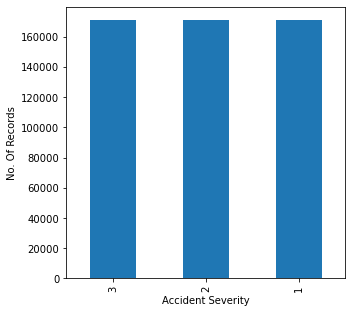

In [53]:
#Checking the new sampled Data set for balance
acc_sev_counts=pd.value_counts(df_target_smpl['Accident_Severity'],sort=True)
plt.figure(figsize=(5,5))
acc_sev_counts.plot(kind='bar')
plt.xlabel('Accident Severity')
plt.ylabel('No. Of Records')


<h3> Splitting up Training and Testing Data Samples

In [54]:
x1_train, x1_test, y1_train, y1_test = train_test_split(df_train_smpl,df_target_smpl.to_numpy(),test_size=0.7,random_state=42)
y1_train=y1_train.reshape(len(y1_train),)
y1_test=y1_test.reshape(len(y1_test),)

<h3> Implementing Random Forest Classifier With More features Than before

<h4>1. Model with LabelEncoded Data(Sampled)+ All features(63)

In [55]:
model_W_Le = RandomForestClassifier(n_estimators=50)
model_W_Le.fit(x1_train, y1_train)
print("{}".format(model_W_Le.score(x1_test, y1_test)))
metrics.confusion_matrix(y1_test, model_W_Le.predict(x1_test), labels=[3, 2, 1])

0.8988847769692959


array([[100024,  19697,    224],
       [ 16380, 103619,     66],
       [     0,      0, 119649]])

<h4> Getting The Feature Importance
<h5> The Code below is only Usable if you have Data Frames( i.e. x1_train , y1_train ) as Traning and ( i.e. x1_test , y1_test ) as Testing Data.

In [56]:
# Get numerical feature importances
importances = list(model_W_Le.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x1_train.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Feature--------{}: Importance: {}'.format(*pair)) for pair in feature_importances];

Feature--------Time_Conv: Importance: 0.07
Feature--------Location_Easting_OSGR: Importance: 0.06
Feature--------Longitude: Importance: 0.06
Feature--------Latitude: Importance: 0.06
Feature--------LSOA_of_Accident_Location_E: Importance: 0.06
Feature--------Location_Northing_OSGR: Importance: 0.05
Feature--------Local_Authority_(District): Importance: 0.04
Feature--------1st_Road_Number: Importance: 0.04
Feature--------Age_of_Driver: Importance: 0.04
Feature--------Engine_Capacity_(CC): Importance: 0.04
Feature--------Local_Authority_(Highway)_E: Importance: 0.04
Feature--------Number_of_Vehicles: Importance: 0.03
Feature--------Day_of_Week: Importance: 0.03
Feature--------Speed_limit: Importance: 0.03
Feature--------Vehicle_Type: Importance: 0.03
Feature--------Vehicle_Manoeuvre: Importance: 0.03
Feature--------Age_of_Vehicle: Importance: 0.03
Feature--------1st_Road_Class: Importance: 0.02
Feature--------Junction_Detail: Importance: 0.02
Feature--------Urban_or_Rural_Area: Importanc

<h3> Visualize a random Tree from the Forest

In [79]:

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = model_W_Le.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = x1_train.columns, rounded = True, precision = 1)





In [80]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [81]:
# Write graph to a png file
graph.write_png('tree.jpg')

<h3>Now Lets Implement Our Classifier with Only the most Important features</h3>
<h4><br>2. Model with LabelEncoded Data(Sampled) + Most Important Features(Found above)</h4>
<h7>-----------------------------------------------------------------------------------------------------------------------------------------------------------------</h7>
<h7><br>Here I have considered top features according to their feature_importance>= 2%.

In [57]:
#Only keeping the most important Features
most_imp_ftr_cols=np.array(feature_importances)[np.array(feature_importances)[:,1].astype(float)>=0.02][:,0]
most_imp_ftr_cols

array(['Time_Conv', 'Location_Easting_OSGR', 'Longitude', 'Latitude',
       'LSOA_of_Accident_Location_E', 'Location_Northing_OSGR',
       'Local_Authority_(District)', '1st_Road_Number', 'Age_of_Driver',
       'Engine_Capacity_(CC)', 'Local_Authority_(Highway)_E',
       'Number_of_Vehicles', 'Day_of_Week', 'Speed_limit', 'Vehicle_Type',
       'Vehicle_Manoeuvre', 'Age_of_Vehicle', '1st_Road_Class',
       'Junction_Detail', 'Urban_or_Rural_Area', 'Age_Band_of_Driver',
       'Driver_IMD_Decile', 'Vehicle_IMD_Decile'], dtype='<U39')

In [58]:
x2_train=x1_train[most_imp_ftr_cols]
x2_test=x1_test[most_imp_ftr_cols]
y2_train=y1_train
y2_test=y1_test

In [59]:
#Re-training the same model
model_W_Le.fit(x2_train, y2_train)
print("{}".format(model_W_Le.score(x2_test, y2_test)))
metrics.confusion_matrix(y2_test, model_W_Le.predict(x2_test), labels=[3, 2, 1])

0.8941274929864121


array([[ 98620,  21064,    261],
       [ 16673, 103312,     80],
       [     0,      0, 119649]])

<h3> Now Lets Implement Our Classifier with some HyperParameters using Parameter Tuning</h3>
<h7>-----------------------------------------------------------------------------------------------------------------------------------------------------------------</h7>
<h7><br> Previously we have tried implementing Random Forest Classifier only with Accident Dataset. But the results didn't look promising for: <br>Accident Severity=2 <b>(Serious)</b> and Accident Severity=1 <b>(Fatal)</b>
<br>Now that we have: 
<br>1. Sampled our dataset w.r.t our output feature.
<br>And we've got =~ 89.5% accuracy with just selecting top Features. We may now apply some hyperparameter tuning and try to improve accuracy as much as possible. </h7>

<h4>3. Model with LabelEncoded Data(Sampled) + Most Important Features + HyperParameters + RandomizedSearchCV + CrossValidation 

In [60]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [20, 28, 37, 46, 55, 64, 73, 82, 91, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [61]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_W_Le_Hp = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations, and use all available cores
model_W_Le_Hp_Rnd = RandomizedSearchCV(estimator = model_W_Le_Hp, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_W_Le_Hp_Rnd.fit(x2_train, y2_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 23.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 28, 37, 46, 55, 64,
                                                         73, 82, 91, 100]},
                   random_state=42, verbose=2)

In [62]:
dump(model_W_Le_Hp_Rnd, 'RF_model_W_Le_Hp_Rnd.joblib') 
#model_W_Le_Hp_Rnd=load('RF_model_W_Le_Hp_Rnd.joblib')

['RF_model_W_Le_Hp_Rnd.joblib']

In [63]:
#View the best parameters of the best estimator
model_W_Le_Hp_Rnd.best_params_

{'n_estimators': 73,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [64]:
#Test ur model with the best estimator 
metrics.accuracy_score(y2_test, model_W_Le_Hp_Rnd.best_estimator_.predict(x2_test))

0.9103539741810993

In [65]:
#Test ur model with the best estimator 
metrics.confusion_matrix(y2_test, model_W_Le_Hp_Rnd.best_estimator_.predict(x2_test), labels=[3, 2, 1])

array([[107029,  12813,    103],
       [ 19269, 100739,     57],
       [     0,      0, 119649]])

<h4>4. Model with LabelEncoded Data(Sampled) + Most Important Features + HyperParameters + GridSearchCV + CrossValidation 

In [67]:
# Create the parameter grid based on the results of ur above random search 
param_grid_2 = {
    'bootstrap': [False],
    'max_depth': [30, 40, 50],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [63, 73, 83]
}

# Instantiate the grid search model
model_W_Le_Hp_Grd = GridSearchCV(estimator = model_W_Le_Hp, param_grid = param_grid_2, 
                          cv = 3, n_jobs = -1, verbose = 2)
model_W_Le_Hp_Grd.fit(x2_train, y2_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 53.7min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [30, 40, 50],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [63, 73, 83]},
             verbose=2)

In [68]:
dump(model_W_Le_Hp_Grd, 'RF_model_W_Le_Hp_Grd.joblib') 
#model_W_Le_Hp_Rnd=load('RF_model_W_Le_Hp_Grd.joblib')

['RF_model_W_Le_Hp_Grd.joblib']

In [69]:
#View the best parameters of the best estimator
model_W_Le_Hp_Grd.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 73}

In [70]:
#Test ur model with the best estimator 
best_Mdl_W_Le_Hp_Grd=model_W_Le_Hp_Grd.best_estimator_
best_Mdl_W_Le_Hp_Grd.score(x2_test, y2_test)

0.9114689191706589

In [71]:
metrics.confusion_matrix(y2_test,best_Mdl_W_Le_Hp_Grd.predict(x2_test),labels=[3,2,1])

array([[107450,  12396,     99],
       [ 19304, 100719,     42],
       [     0,      0, 119649]])

<h3>Accuracy Description After Adding More Features + Performing Sampling:-
<br>-------------------------------------------------------------------------------------------------
<h4>1. Model with LabelEncoded Data(Sampled) + All features(63) -------------------- 98.02%
<br>2. Model with LabelEncoded Data(Sampled) + Most Important Features(16) ----- 97.81%
<br>3. Model with LabelEncoded Data(Sampled) + Most Important Features(16) + HyperParameters + RandomizedSearchCV + CrossValidation -- 98.04%
<br>4. Model with LabelEncoded Data(Sampled) + Most Important Features(16) + HyperParameters + GridSearchCV + CrossValidation ------------ 98.03%

From Confusion matrix calucalated in each of the above cases you can now verify that our newly Trained classifier can effectively classify in each of the 3 Accident Severity types.

## Referrences
- **[For Hyperparameter Tuning and RandomForest Classifier]**
    - https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 
- **[For Handling Imbalanced Data Sets]**
    - https://github.com/krishnaik06/Handle-Imbalanced-Dataset 
- **[For LabelEncoding]** 
    - https://jinchuika.com/post/1-preprocessing-part-1/ 
- **[For Feature Selection]**
    - https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e 
- **[Pickle tutorial]**
    - https://www.youtube.com/watch?v=KfnhNlD8WZI&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=5 
- **[getDummies& OneHotEncoding]**
    - https://www.youtube.com/watch?v=9yl6-HEY7_s&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=6 
    - https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example#:~:text=hot%2Dencoded%2Dfeatures-,One%2Dhot%20encoding%20vs%20Dummy%20variables,%2C%20but%20one%2Dhot%20encoding.
- **[How to handle imbalanced data set]**
    - https://machinelearningmastery.com/data-sampling-methods-for-imbalanced-classification/  